In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")

df = pd.read_csv("../../data/teleconnect_churn_synth.csv")
print(f"Estructura del conjunto de datos")
print(f"Variables{df.shape[1]}, Observaciones{df.shape[0]}")
df.head()

Estructura del conjunto de datos
Variables34, Observaciones15500


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechComplaint,NumSupportCalls,CustomerSatisfaction,HasMultipleServices,AvgMonthlyRevenue,PaymentRegularityIndex,SupportInteractionRate,LoyaltyScore,PromoResponse,NetPromoterScore
0,7590-VHVEG,No,Female,0.0,Yes,No,1.0,No,No phone service,DSL,...,0,2,4,0,29.850000,0.966667,1.000000,43.89,1,8
1,5575-GNVDE,No,Male,0.0,No,No,34.0,Yes,No,DSL,...,1,1,1,0,55.573529,0.283333,0.029412,30.56,0,0
2,3668-QPYBK,Yes,Male,0.0,No,No,2.0,Yes,No,DSL,...,0,1,5,0,54.075000,0.566667,0.500000,42.44,1,9
3,7795-CFOCW,No,Male,0.0,No,No,45.0,No,No phone service,DSL,...,0,2,1,0,40.905556,0.433333,0.044444,39.67,0,0
4,9237-HQITU,Yes,Female,0.0,No,No,2.0,Yes,No,Fiber optic,...,0,1,2,0,75.825000,0.700000,0.500000,27.11,0,2


In [3]:
df.info(memory_usage="null")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customerID                    15500 non-null  object 
 1   Churn                         15500 non-null  object 
 2   gender                        15500 non-null  object 
 3   SeniorCitizen                 15500 non-null  float64
 4   Partner                       15500 non-null  object 
 5   Dependents                    15500 non-null  object 
 6   tenure                        15500 non-null  float64
 7   PhoneService                  15500 non-null  object 
 8   MultipleLines                 15500 non-null  object 
 9   InternetService               15500 non-null  object 
 10  OnlineSecurity                15500 non-null  object 
 11  OnlineBackup                  15500 non-null  object 
 12  DeviceProtection              15500 non-null  object 
 13  T

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,15500,15500,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,15500,2,No,13631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,15500,2,Male,7832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,15500.0,NaN,NaN,NaN,0.166492,0.367307,0.0,0.0,0.0,0.015805,1.0
Partner,15500,2,No,8018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,15500,2,No,10883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,15500.0,NaN,NaN,NaN,32.647932,24.501873,1.0,9.0,29.060859,56.0,72.0
PhoneService,15500,2,Yes,13998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,15500,3,No,7466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,15500,3,Fiber optic,6782,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum().sort_values(ascending=False).head(10)
df.duplicated().sum()

np.int64(0)

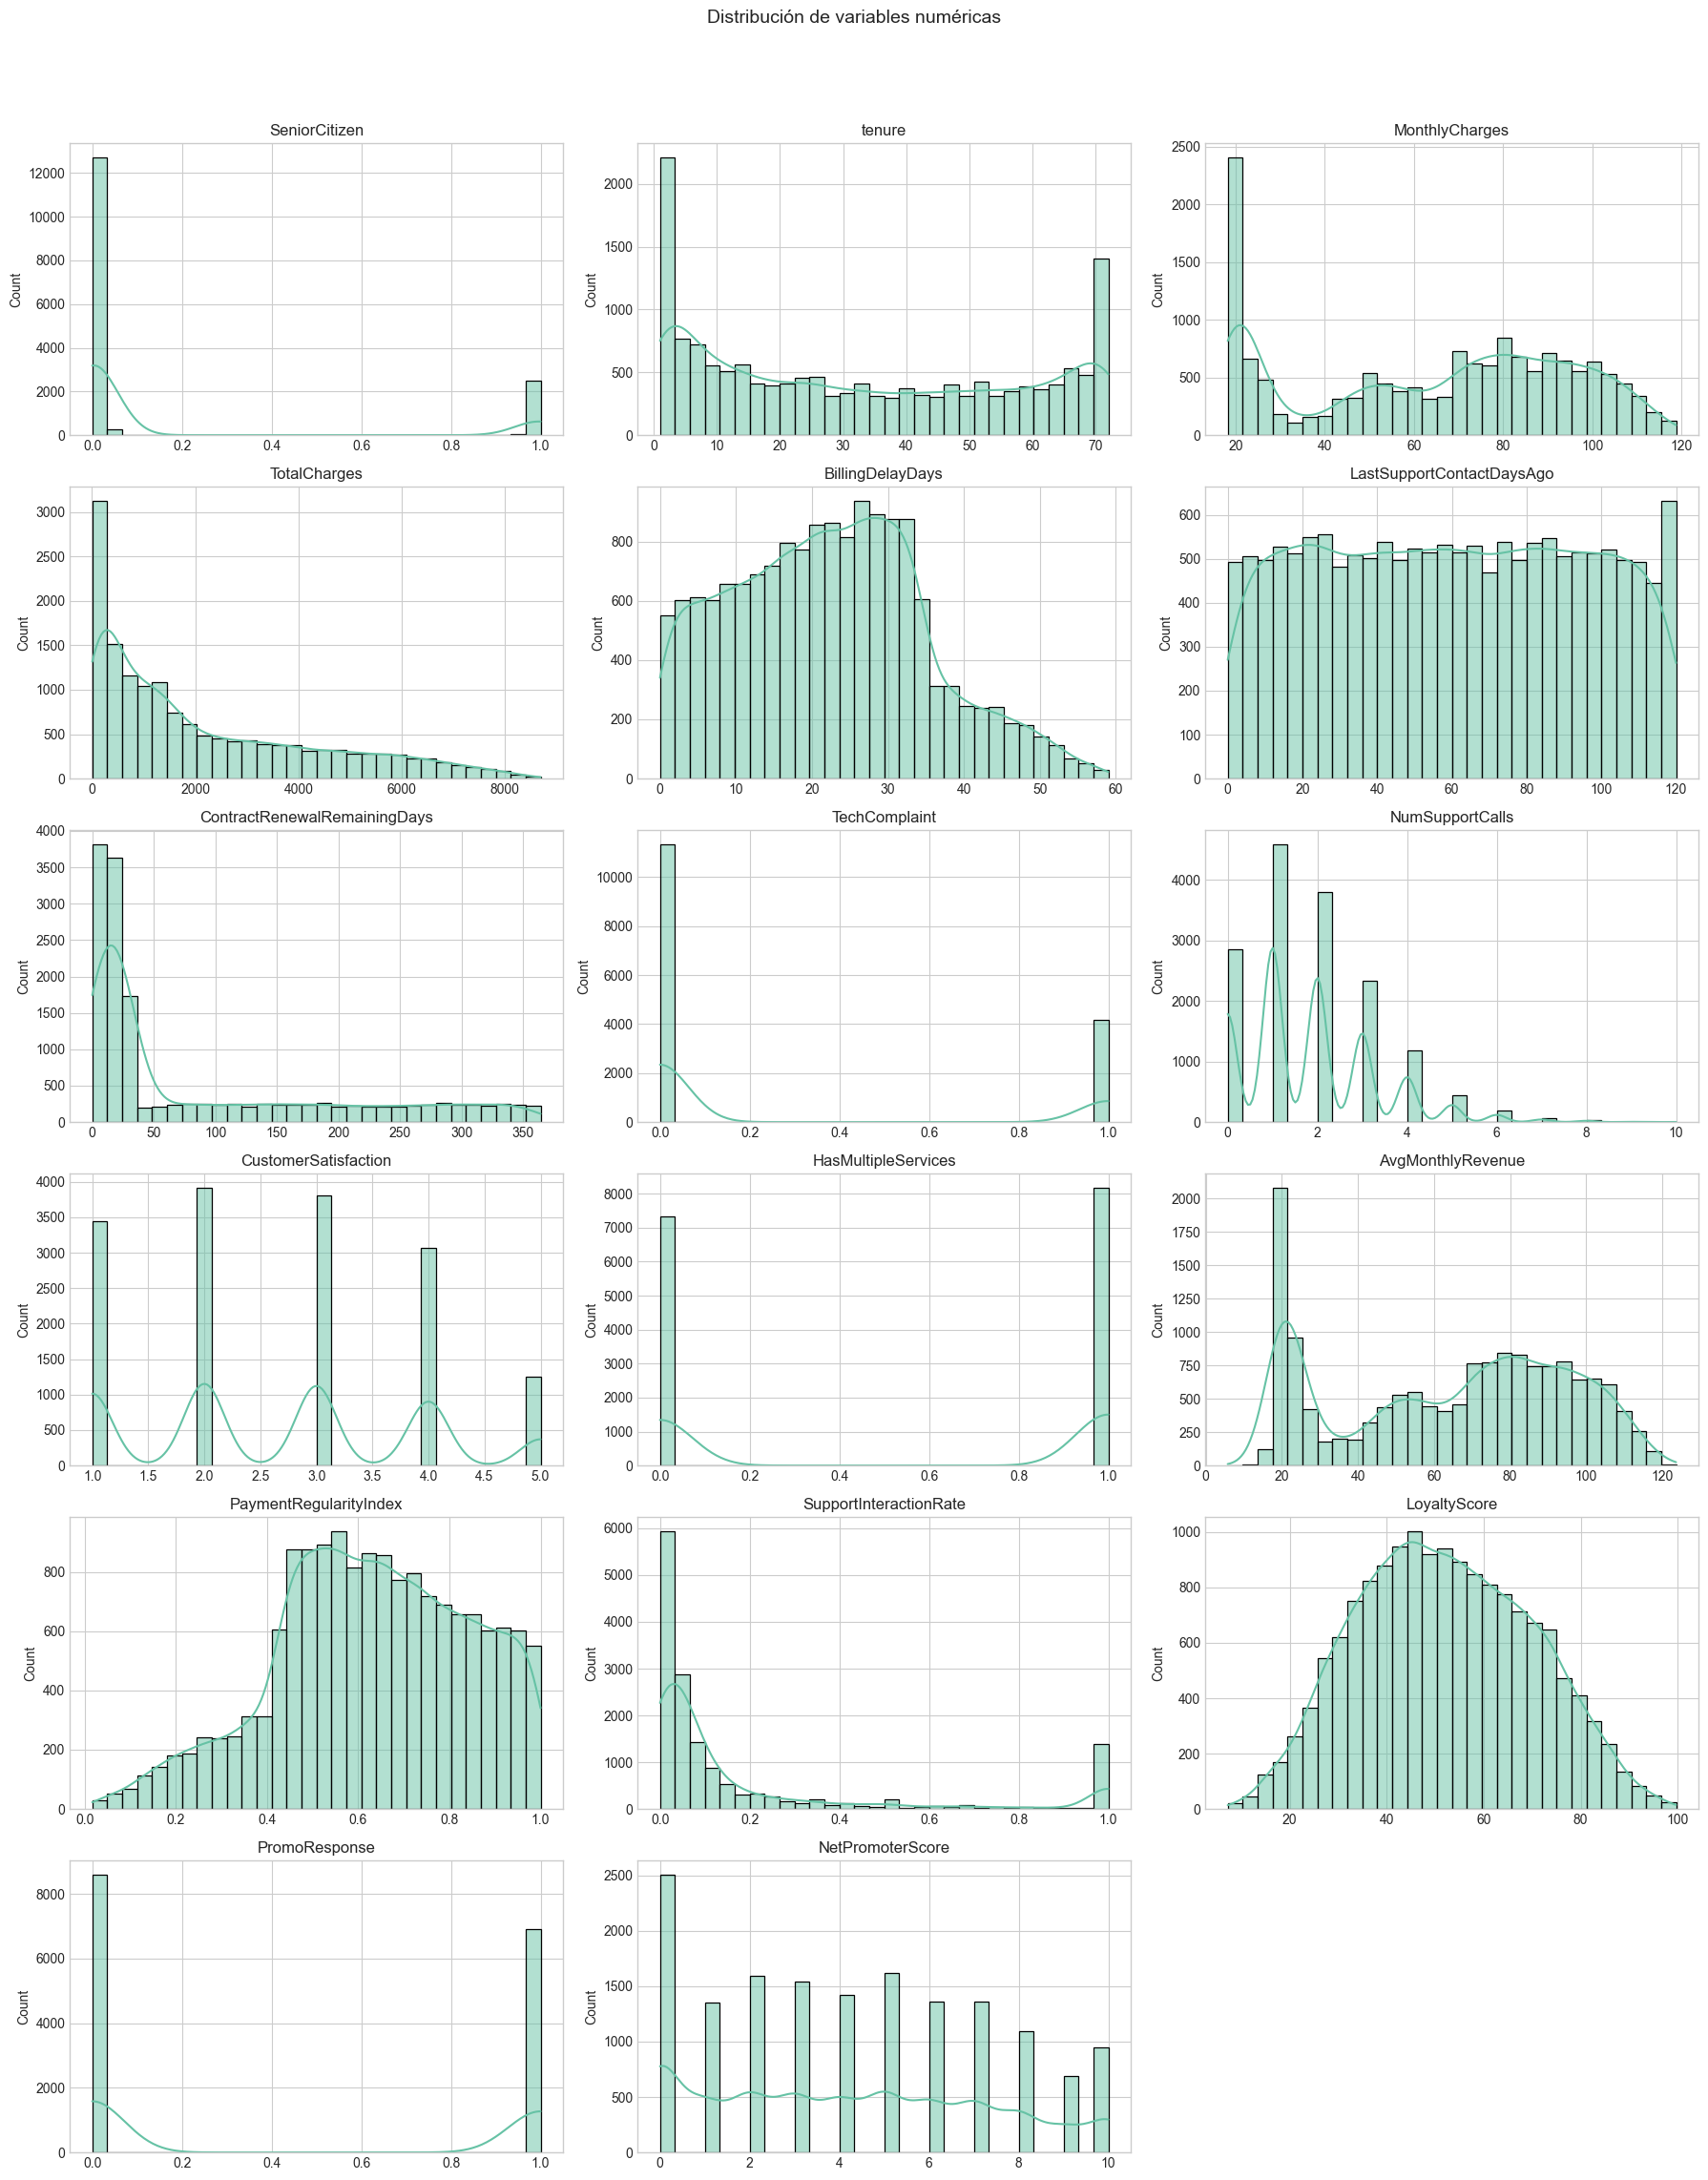

In [6]:
num_cols = df.select_dtypes(include=np.number).columns

n = len(num_cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(18, 4*rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.xlabel("")
    plt.title(col)

plt.suptitle("Distribución de variables numéricas", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

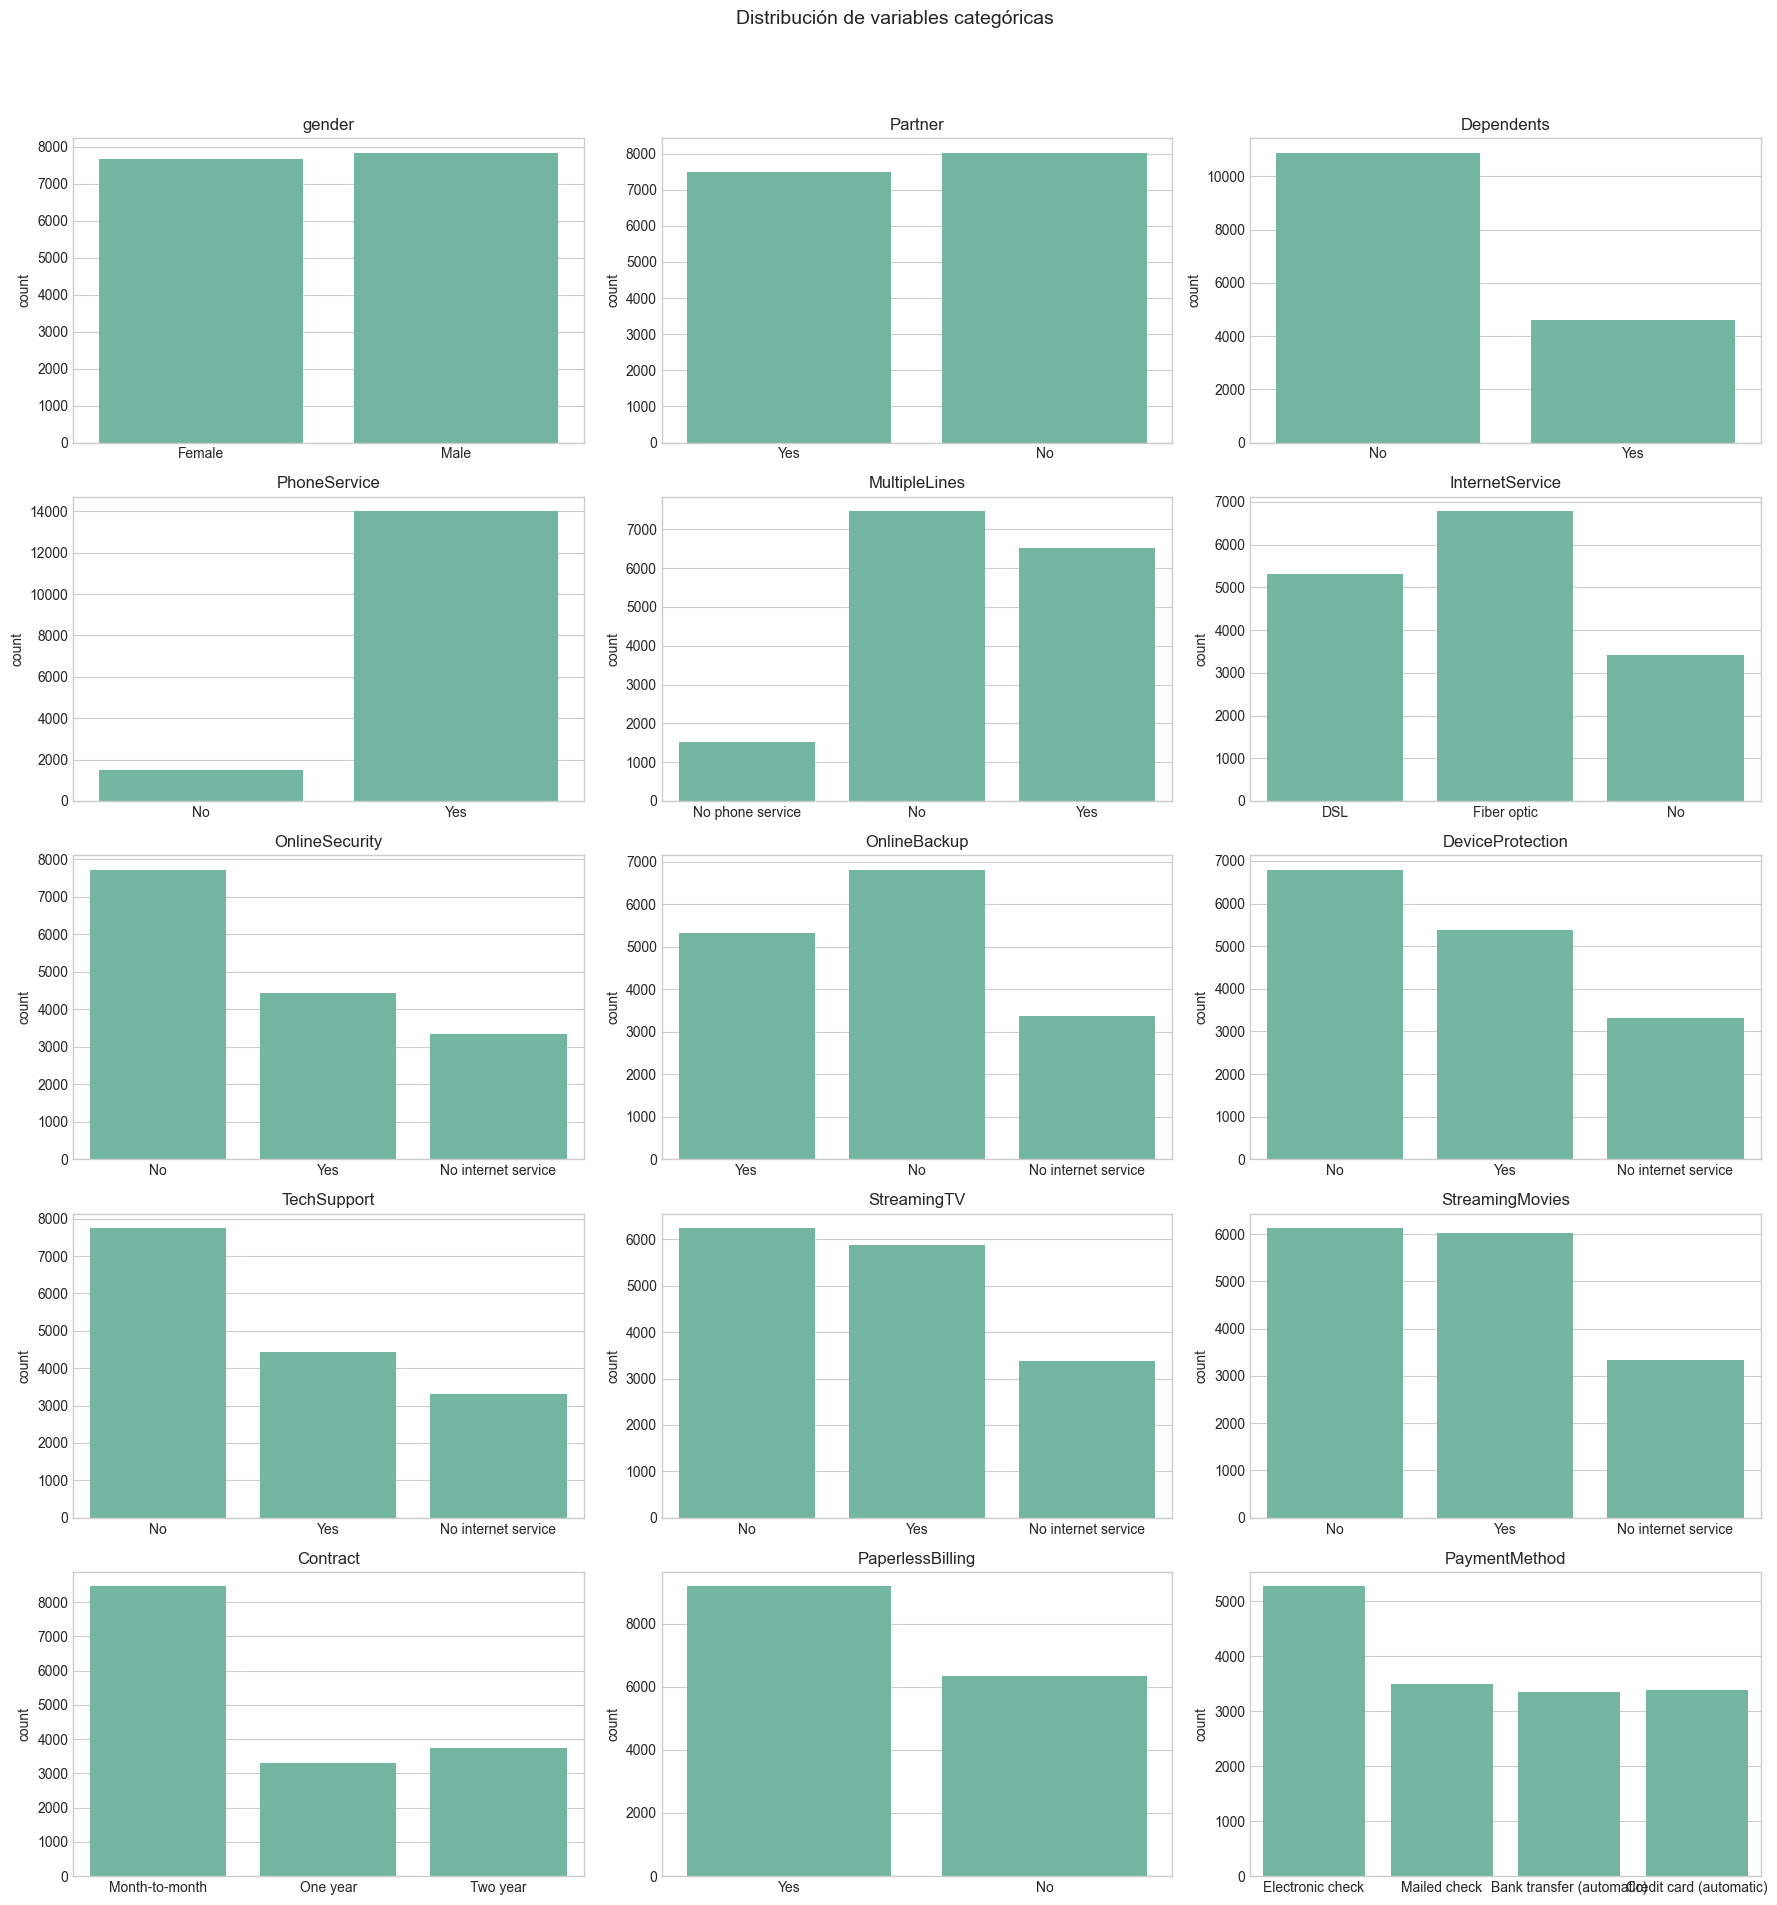

In [7]:
cat_cols = df.select_dtypes(exclude=np.number).columns.drop(["customerID", "Churn"])

n = len(cat_cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(18, 4*rows))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=col, data=df)
    plt.xlabel("")
    plt.title(col)

plt.suptitle("Distribución de variables categóricas", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


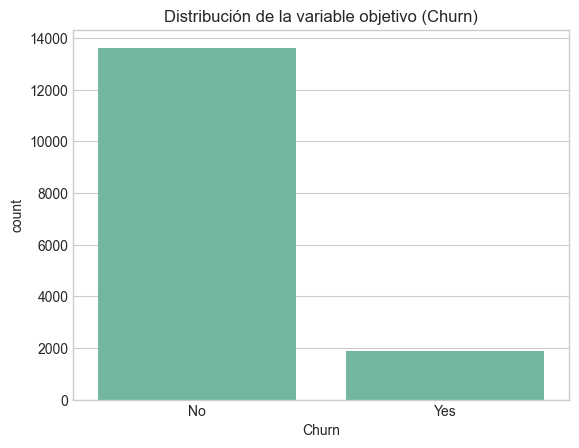

In [8]:
df['Churn'].value_counts(normalize=True)
sns.countplot(x='Churn', data=df)
plt.title("Distribución de la variable objetivo (Churn)")
plt.show()

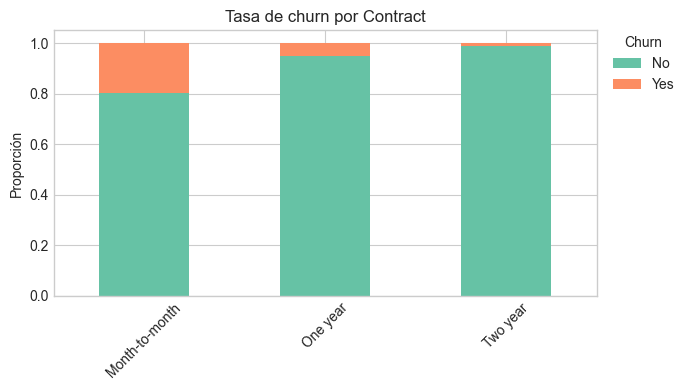

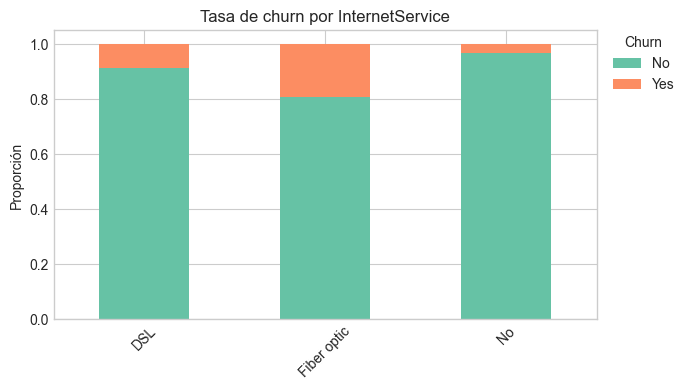

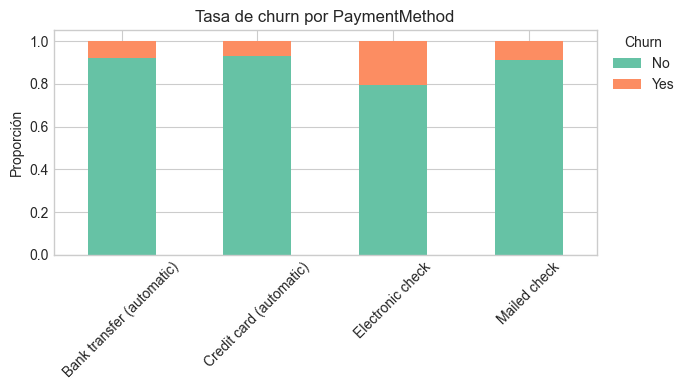

In [9]:
important_cats = ['Contract', 'InternetService', 'PaymentMethod']

for col in important_cats:
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    
    ax = churn_rate.plot(kind='bar', stacked=True, figsize=(7,4))
    
    plt.title(f"Tasa de churn por {col}")
    plt.ylabel("Proporción")
    plt.xlabel("")
    plt.xticks(rotation=45)

    # Leyenda fuera del gráfico (a la derecha)
    plt.legend(title="Churn", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    plt.tight_layout()
    plt.show()


In [10]:
df['ChurnBinary'] = df['Churn'].map({'Yes': 1, 'No': 0})
target_corr = df.corr(numeric_only=True)['ChurnBinary'].dropna().sort_values(ascending=False)
target_corr.head(10)

ChurnBinary               1.000000
SupportInteractionRate    0.197673
MonthlyCharges            0.117853
AvgMonthlyRevenue         0.117399
SeniorCitizen             0.088908
PaymentRegularityIndex    0.057389
TechComplaint             0.034378
NumSupportCalls           0.014959
CustomerSatisfaction      0.014540
NetPromoterScore          0.011289
Name: ChurnBinary, dtype: float64

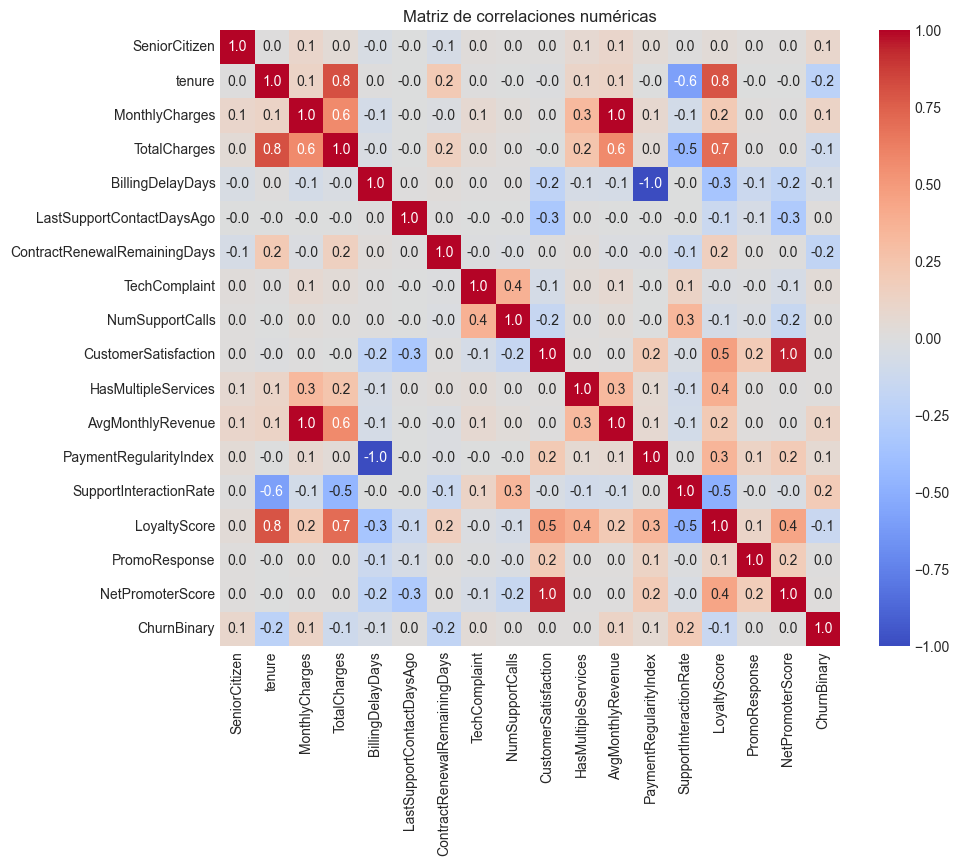

In [11]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Matriz de correlaciones numéricas")
plt.show()

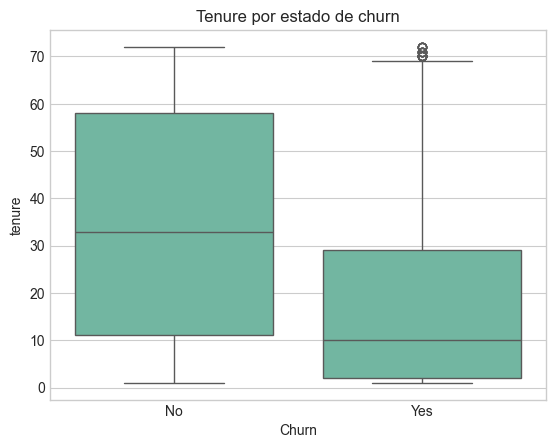

In [12]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure por estado de churn")
plt.show()

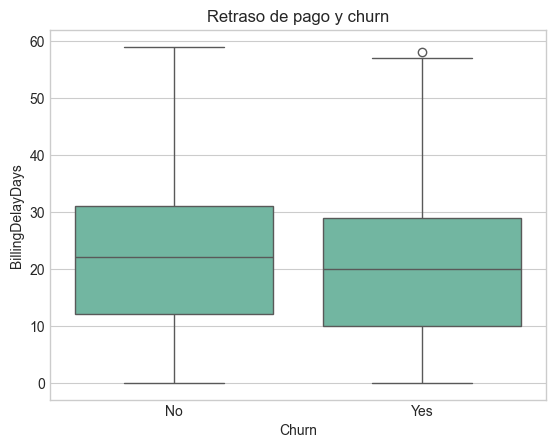

In [13]:
sns.boxplot(x='Churn', y='BillingDelayDays', data=df)
plt.title("Retraso de pago y churn")
plt.show()

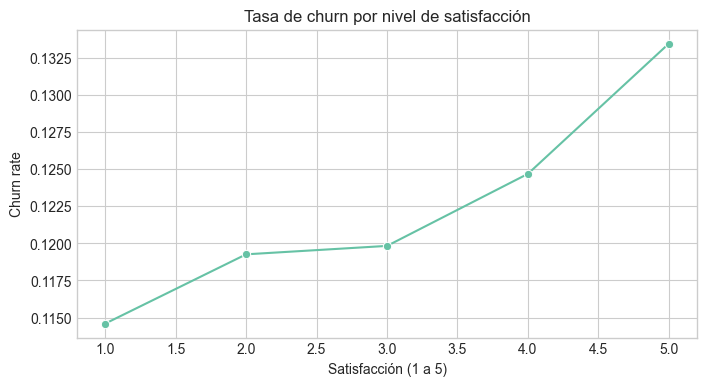

In [14]:
churn_by_sat = df.groupby('CustomerSatisfaction')['ChurnBinary'].mean()

plt.figure(figsize=(8,4))
sns.lineplot(x=churn_by_sat.index, y=churn_by_sat.values, marker='o')
plt.title("Tasa de churn por nivel de satisfacción")
plt.ylabel("Churn rate")
plt.xlabel("Satisfacción (1 a 5)")
plt.show()

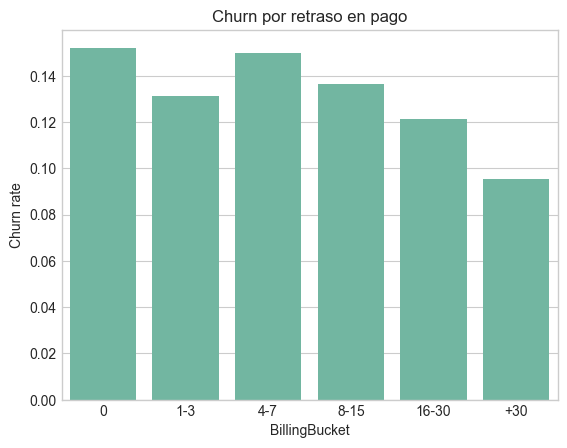

In [16]:
df['BillingBucket'] = pd.cut(
    df['BillingDelayDays'],
    bins=[-1, 0, 3, 7, 15, 30, 999],
    labels=['0','1-3','4-7','8-15','16-30','+30']
)

# Aquí va observed
billing_churn = (
    df.groupby('BillingBucket', observed=False)['ChurnBinary']
      .mean()
      .reset_index()
)

sns.barplot(
    data=billing_churn,
    x='BillingBucket',
    y='ChurnBinary'
)

plt.title("Churn por retraso en pago")
plt.ylabel("Churn rate")
plt.show()


In [17]:
churn_rate = df['Churn'].value_counts(normalize=True)['Yes']
print(f"Churn global del dataset: {churn_rate*100:.2f}%")

Churn global del dataset: 12.06%
